### NLP Project Model
+ Emotion Detection In Text
+ Text Classifier 

In [1]:
# Load EDA Packages
import pandas as pd
import numpy as np
import re

In [2]:
# Load Data Visualization Packages
import seaborn as sns

In [3]:
# Load Data Preprocessing Packages
import neattext.functions as nfx

In [4]:
# load ML Packages

#Estimators
#from sklearn.linear_model import LogisticRegression

#Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [5]:
import matplotlib.pyplot as plt

In [6]:
# Load Dataset
df = pd.read_csv("data/emotion_dataset_2.csv")

In [159]:
df.head(50)

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
5,5,fear,I'm expecting an extremely important phonecall...,Im expecting extremely important phonecall min...
6,6,sadness,.Couldnt wait to see them live. If missing th...,Couldnt wait live missing NH7 wasnt painful en...
7,7,surprise,maken Tip 2: Stop op een moment dat je het hel...,maken Tip 2: Stop op een moment dat je het hel...
8,8,surprise,En dan krijg je ff een cadeautje van een tweep...,En dan krijg je ff een cadeautje van een tweep...
9,9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...,Drummer Boy bij op verzoek van : welke ...


In [160]:
# Data Visualization
#Value Counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

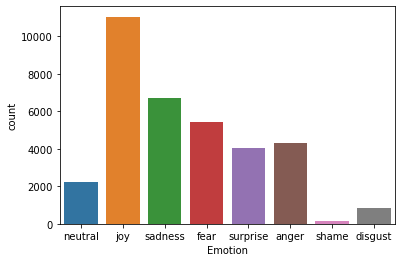

In [7]:
# Plotting
sns.countplot(x='Emotion',data=df)

In [8]:
#Data Preprocessing
dir(nfx)


['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [9]:

# removing user handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)
# removing stopwords
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)
# removing special hashtags
df['Clean_Text'] = df['Text'].apply(nfx.remove_hashtags)
# removing special punctuations
#df['Clean_Text'] = df['Text'].apply(nfx.remove_punctuations)
df['Clean_Text'] = df['Text'].str.replace('[^\w\s]','')


C:\Users\epteh\AppData\Local\Temp/ipykernel_2356/2834315845.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Clean_Text'] = df['Text'].str.replace('[^\w\s]','')


In [10]:
df.head(10)

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,Why
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye The true hazel eyeand so brillia...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Iluvmiasantos ugh babe hugggzzz for u babe n...
5,5,fear,I'm expecting an extremely important phonecall...,Im expecting an extremely important phonecall ...
6,6,sadness,.Couldnt wait to see them live. If missing th...,Couldnt wait to see them live If missing them...
7,7,surprise,maken Tip 2: Stop op een moment dat je het hel...,maken Tip 2 Stop op een moment dat je het hele...
8,8,surprise,En dan krijg je ff een cadeautje van een tweep...,En dan krijg je ff een cadeautje van een tweep...
9,9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...,1116am Drummer Boy bij op verzoek van BiemOos...


In [11]:
# replace uppercase to lowercase
df['Clean1_Text'] = df['Clean_Text'].str.lower()
df.head(10)

,Unnamed: 0,Emotion,Text,Clean_Text,Clean1_Text
0,0,neutral,Why ?,Why,why
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow,sage act upgrade on my to do list for tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...,on the way to my homegirl baby funeral man i h...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye The true hazel eyeand so brillia...,such an eye the true hazel eyeand so brillia...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Iluvmiasantos ugh babe hugggzzz for u babe n...,iluvmiasantos ugh babe hugggzzz for u babe n...
5,5,fear,I'm expecting an extremely important phonecall...,Im expecting an extremely important phonecall ...,im expecting an extremely important phonecall ...
6,6,sadness,.Couldnt wait to see them live. If missing th...,Couldnt wait to see them live If missing them...,couldnt wait to see them live if missing them...
7,7,surprise,maken Tip 2: Stop op een moment dat je het hel...,maken Tip 2 Stop op een moment dat je het hele...,maken tip 2 stop op een moment dat je het hele...
8,8,surprise,En dan krijg je ff een cadeautje van een tweep...,En dan krijg je ff een cadeautje van een tweep...,en dan krijg je ff een cadeautje van een tweep...
9,9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...,1116am Drummer Boy bij op verzoek van BiemOos...,1116am drummer boy bij op verzoek van biemoos...


In [16]:
# Vectorizer
cv=CountVectorizer()
X=cv.fit_transform(Xfeatures)

In [17]:
Xfeatures = df['Clean1_Text']
ylabels = df['Emotion']

Xfeatures

0                                                    why  
1           sage act upgrade on my to do list for tommorow
2        on the way to my homegirl baby funeral man i h...
3         such an eye  the true hazel eyeand so brillia...
4        iluvmiasantos ugh babe hugggzzz for u   babe n...
                               ...                        
34787    michelgw have you gift hope you like it its ha...
34788    the world didnt give it to meso the world most...
34789                              a man robbed me today  
34790        youu call it jealousy i call it of losing you
34791    i think about you baby and i dream about you a...
Name: Clean1_Text, Length: 34792, dtype: object

In [18]:
# Split Dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)



In [19]:
#Load Machine Learning Pkgs

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC, LinearSVC, NuSVC

#Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

### Building SVM Model

In [20]:

lsvm= LinearSVC()

#fitting
lsvm.fit(X_train,y_train)

# predictions
y_pred_for_lsvm = lsvm.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
#Importing Packages
#from sklearn.svm import SVC, LinearSVC

#Create an svm Classifier
#lsvm= LinearSVC()

#Train and fit data
#lsvm.fit(X_train, y_train)

#Prediction
#y_pred_for_lsvm = lsvm.predict(X_test)

In [21]:
#test accuracy
print('Linear SVM testing accuracy score')
print(accuracy_score(y_test,y_pred_for_lsvm))


Linear SVM testing accuracy score
0.6234910902471738


In [22]:
#training accuracy
y_pred_for_lsvm2 = lsvm.predict(X_train)
print('Linear SVM trainng accuracy score')
print(accuracy_score(y_train,y_pred_for_lsvm2))

Linear SVM trainng accuracy score
0.9716678984971668


### Model Evaluation

In [171]:
print(classification_report(y_test,y_pred_for_lsvm))

              precision    recall  f1-score   support

       anger       0.58      0.58      0.58      1283
     disgust       0.50      0.26      0.34       292
        fear       0.71      0.68      0.69      1645
         joy       0.67      0.71      0.69      3311
     neutral       0.56      0.77      0.65       675
     sadness       0.59      0.57      0.58      2015
       shame       0.81      0.94      0.87        36
    surprise       0.52      0.44      0.47      1181

    accuracy                           0.62     10438
   macro avg       0.62      0.62      0.61     10438
weighted avg       0.62      0.62      0.62     10438



In [23]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_for_lsvm)

array([[ 748,   13,   81,  158,   68,  155,    1,   59],
       [  35,   75,   35,   62,    9,   42,    1,   33],
       [  90,    7, 1112,  179,   53,  126,    0,   78],
       [ 149,   18,  146, 2353,  156,  283,    3,  203],
       [  22,    1,    9,   62,  523,   47,    0,   11],
       [ 166,   21,  124,  381,   82, 1148,    2,   91],
       [   0,    0,    0,    2,    0,    0,   34,    0],
       [  73,   16,   70,  329,   36,  141,    1,  515]], dtype=int64)

<Figure size 576x576 with 0 Axes>

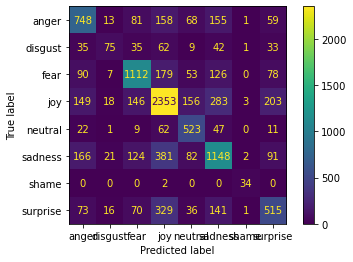

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plot_confusion_matrix(lsvm,X_test,y_test)

In [173]:
import joblib

model_file = open("emotion_classifier_lsvm_15_June_2022.pkl","wb")
joblib.dump(lsvm,model_file)
model_file.close()

# Making a prediction


In [174]:
sample_text = ["Today was a very difficult day"]

In [175]:
vect = cv.transform(sample_text).toarray()

In [176]:
lsvm.predict(vect)

array(['fear'], dtype=object)

In [177]:
# check for probability percentages/confidence score
#LinearSVC_classifier = SklearnClassifier(SVC(kernel='linear',probability=True))
#lsvm.predict_proba(vect)
#Getting all classes to be displayed
lsvm.classes_




array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [178]:
#np.max(lsvm.predict_proba(vect))

In [179]:
#def predict_emotion(sample_text,model):
    #myvect = cv.transform(sample_text).toarray()
    #prediction = model.predict(myvect)
    #pred_proba = model.predict_proba(myvect)
    #pred_percentage_for_all = dict(zip(model.classes_,pred_proba[0]))
    #print("Prediction: {}, Prediction Score:{}".format(prediction[0],np.max(pred_proba)))
    #return pred_percentage_for_all
    

In [180]:
#predict_emotion(sample_text,nv_model)